# Import essential packages

In [1]:
import tensorflow as tf
from keras import layers , datasets , models
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train) , (X_test , y_test) = datasets.cifar10.load_data()

## X_train has 50000 training examples with dimensions of 32x32 pixels and RGB colour channel

In [3]:
X_train.shape

(50000, 32, 32, 3)

## y_train has 50000 training examples with one column that contains the class number it belongs to

In [4]:
y_train.shape

(50000, 1)

## X_test has 10000 training examples with dimensions of 32x32 pixels and RGB colour channel

In [5]:
X_test.shape

(10000, 32, 32, 3)

## y_test has 10000 training examples with one column that contains the class number it belongs 

In [6]:
y_test.shape

(10000, 1)

In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
y_train[:5]
    

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [10]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
def show_image(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

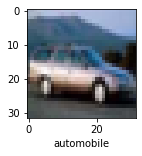

In [12]:
show_image(X_train,y_train,4)

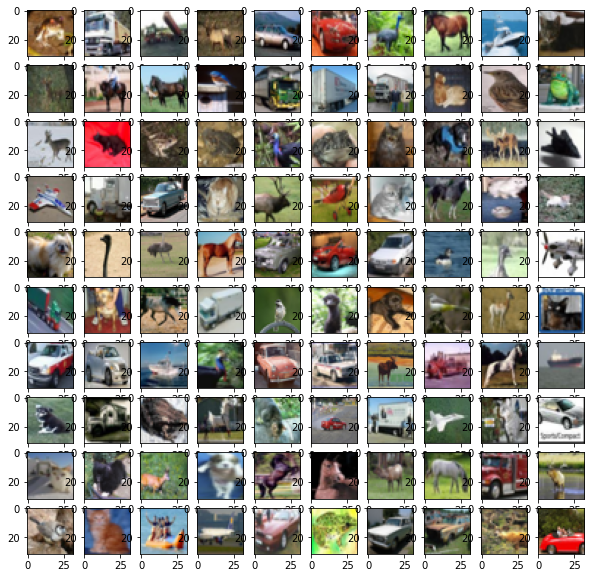

In [6]:
fig, ax = plt.subplots(10,10, figsize = (10,10))
axes = ax.flatten()
for i in range(100):
    
    axes[i].imshow(np.reshape(X_train[i], (32,32,3)))
plt.show()

In [7]:
#Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

# Using ANN

In [15]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
history=ann.fit(X_train,y_train,epochs=5,verbose=1,validation_data=(X_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 233s 149ms/step - loss: 1.9222 - accuracy: 0.3113 - val_loss: 1.6813 - val_accuracy: 0.4013
Epoch 2/5
1563/1563 [==============================] - 208s 133ms/step - loss: 1.6389 - accuracy: 0.4227 - val_loss: 1.7271 - val_accuracy: 0.3880
Epoch 3/5
1563/1563 [==============================] - 196s 125ms/step - loss: 1.5497 - accuracy: 0.4549 - val_loss: 1.5243 - val_accuracy: 0.4600
Epoch 4/5
1563/1563 [==============================] - 219s 140ms/step - loss: 1.4875 - accuracy: 0.4793 - val_loss: 1.4951 - val_accuracy: 0.4681
Epoch 5/5
1563/1563 [==============================] - 241s 154ms/step - loss: 1.4366 - accuracy: 0.4971 - val_loss: 1.4693 - val_accuracy: 0.4701


Classification Report

In [16]:
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("Classification report :\n",classification_report(y_test,y_pred_classes))

Classification report :
               precision    recall  f1-score   support

           0       0.57      0.53      0.55      1000
           1       0.56      0.67      0.61      1000
           2       0.44      0.21      0.28      1000
           3       0.38      0.24      0.30      1000
           4       0.39      0.44      0.41      1000
           5       0.39      0.40      0.39      1000
           6       0.65      0.32      0.42      1000
           7       0.37      0.73      0.49      1000
           8       0.55      0.69      0.61      1000
           9       0.55      0.48      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.46     10000
weighted avg       0.48      0.47      0.46     10000



In [8]:
def plot_learning_curve(history,epochs):
    epoch_range=range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(['train','val'],loc='upper left')
    plt.show()
    
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(['train','val'],loc='upper left')
    plt.show()

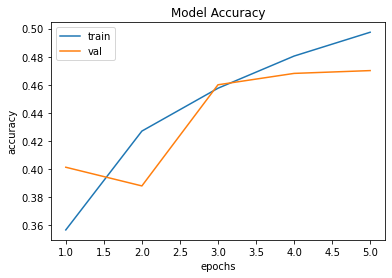

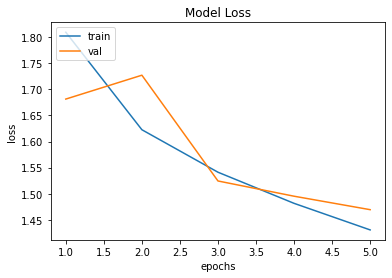

In [19]:
plot_learning_curve(history,5)

# Using CNN

In [9]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history=cnn.fit(X_train,y_train,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.7409 - accuracy: 0.3681 - val_loss: 1.2304 - val_accuracy: 0.5622
Epoch 2/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.1665 - accuracy: 0.5910 - val_loss: 1.0839 - val_accuracy: 0.6145
Epoch 3/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.0071 - accuracy: 0.6482 - val_loss: 0.9944 - val_accuracy: 0.6516
Epoch 4/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.9216 - accuracy: 0.6786 - val_loss: 0.9735 - val_accuracy: 0.6653
Epoch 5/10
1563/1563 [==============================] - 120s 77ms/step - loss: 0.8503 - accuracy: 0.7051 - val_loss: 0.9285 - val_accuracy: 0.6809
Epoch 6/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.7903 - accuracy: 0.7260 - val_loss: 0.9144 - val_accuracy: 0.6895
Epoch 7/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.7481 - accuracy: 0.7403 - val_loss: 0

In [10]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 9s 27ms/step - loss: 0.9067 - accuracy: 0.6977


[0.9067189693450928, 0.697700023651123]

Classification Report

In [11]:
y_pred=cnn.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('Classification Report : \n', classification_report(y_test,y_pred_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.69      0.72      1000
           1       0.80      0.84      0.82      1000
           2       0.56      0.63      0.59      1000
           3       0.47      0.60      0.53      1000
           4       0.69      0.57      0.62      1000
           5       0.66      0.55      0.60      1000
           6       0.77      0.77      0.77      1000
           7       0.78      0.74      0.76      1000
           8       0.78      0.81      0.79      1000
           9       0.79      0.77      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



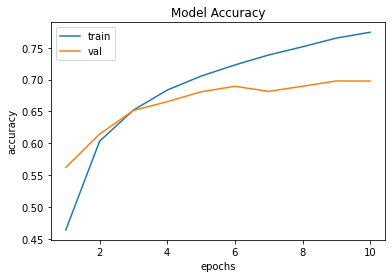

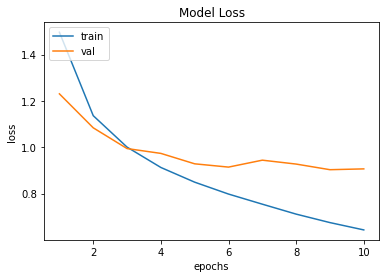

In [12]:
plot_learning_curve(history,10)

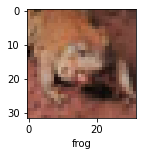

In [13]:
show_image(X_test,y_test,5)

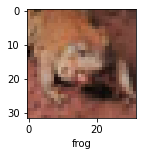

In [14]:
show_image(X_test,y_pred_classes,5)